In [13]:
import cv2,os
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from PIL import Image, ImageFilter

In [8]:
ls /home/acd13264yb/DDDog/Datasets/221206SoRa/Ctrl/

60x_4x_Dapi_test_50nmSTP006/
60x_4x_Dapi_test_50nmSTP006 - Deconvolved 3 iterations, Type Richardson-Lucy_Noise_Auto/
60x_4x_Dapi_test_50nmSTP006 - Deconvolved 3 iterations, Type Richardson-Lucy_Noise_Clear/
60x_4x_Dapi_test_50nmSTP006 - Deconvolved 3 iterations, Type Richardson-Lucy_Noise_Low/
60x_4x_Dapi_test_50nmSTP006 - Deconvolved 3 iterations, Type Richardson-Lucy_Noise_Medium/
60x_4x_Dapi_test_50nmSTP007/
60x_4x_Dapi_test_50nmSTP007 - Deconvolved 3 iterations, Type Richardson-Lucy_Noise_Auto/
60x_4x_Dapi_test_50nmSTP007 - Deconvolved 3 iterations, Type Richardson-Lucy_Noise_Clear/
60x_4x_Dapi_test_50nmSTP007 - Deconvolved 3 iterations, Type Richardson-Lucy_Noise_Low/
60x_4x_Dapi_test_50nmSTP007 - Deconvolved 3 iterations, Type Richardson-Lucy_Noise_Medium/


# Original data (multi-cells image)

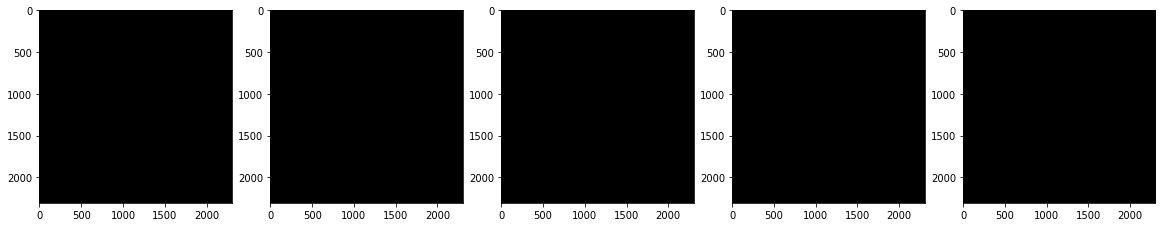

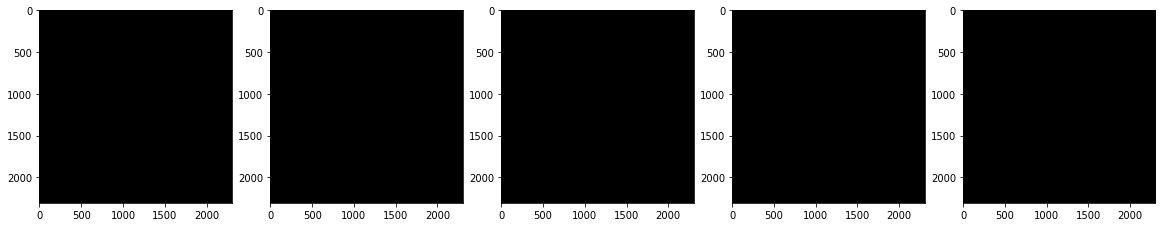

In [3]:
path_home = "/home/acd13264yb/DDDog/Datasets/221206SoRa/"
path_chip = ["VPA/VPA_555CTCF_488H3K27AC_DAPI_003/VPA_555CTCF_488H3K27AC_DAPI_003_XY00",
        "Ctrl/60x_4x_Dapi_test_50nmSTP006/60x_4x_Dapi_test_50nmSTP006_XY00"]

for chip in range(2):
    plt.figure(figsize=(20,20))
    for num in range(1,6):
        path = path_home+path_chip[chip]+str(num)+".ome.tif"
        img = cv2.imread(path)
        plt.subplot(1,5,num)
#         plt.axis("off")
        plt.imshow(img)

/home/acd13264yb/DDDog/Datasets/221206SoRa/VPA/VPA_555CTCF_488H3K27AC_DAPI_003/VPA_555CTCF_488H3K27AC_DAPI_003_XY001.ome.tif
0
0


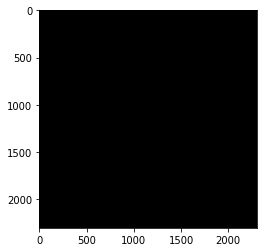

In [22]:
path = path_home+path_chip[0]+str(1)+".ome.tif"
print(path)

# img = Image.open(path)
# plt.figure(figsize=(20,20))
# plt.imshow(img)
img = cv2.imread(path)
print(np.amax(img))
print(np.amin(img))
plt.imshow(img)

In [19]:
print(img.format, img.size, img.mode)
print(img.getextrema())
print(img.getpixel((256, 256)))

TIFF (2304, 2304) I;16
(6, 222)
52


In [12]:
# path1 = "./NDAcquisition-01/NDAcquisition-01_XY001.ome.tif"
# path2 = "./NDAcquisition-01/NDAcquisition-01_XY002.ome.tif"
# path3 = "./NDAcquisition-01/NDAcquisition-01_XY003.ome.tif"
# path4 = "./NDAcquisition-01/NDAcquisition-01_XY004.ome.tif"
# path5 = "./NDAcquisition-01/NDAcquisition-01_XY005.ome.tif"

# stack = cv2.merge([channel(cv2.imread(path1)),channel(cv2.imread(path2)),channel(cv2.imread(path3))])
# plt.figure(figsize=(10,10))
# plt.imshow(stack)
# plt.show()

# segmentation data (one-cell image)

In [62]:
%ls ../Datasets/211202NDAcquisition/CellSplit/NDAcquisition-01x40/NDAcquisition-01x40_XY0004_*

../Datasets/211202NDAcquisition/CellSplit/NDAcquisition-01x40/NDAcquisition-01x40_XY0004_1_0.tif
../Datasets/211202NDAcquisition/CellSplit/NDAcquisition-01x40/NDAcquisition-01x40_XY0004_11_0.tif
../Datasets/211202NDAcquisition/CellSplit/NDAcquisition-01x40/NDAcquisition-01x40_XY0004_12_0.tif
../Datasets/211202NDAcquisition/CellSplit/NDAcquisition-01x40/NDAcquisition-01x40_XY0004_12_1.tif
../Datasets/211202NDAcquisition/CellSplit/NDAcquisition-01x40/NDAcquisition-01x40_XY0004_12_2.tif
../Datasets/211202NDAcquisition/CellSplit/NDAcquisition-01x40/NDAcquisition-01x40_XY0004_12_3.tif
../Datasets/211202NDAcquisition/CellSplit/NDAcquisition-01x40/NDAcquisition-01x40_XY0004_13_0.tif
../Datasets/211202NDAcquisition/CellSplit/NDAcquisition-01x40/NDAcquisition-01x40_XY0004_13_1.tif
../Datasets/211202NDAcquisition/CellSplit/NDAcquisition-01x40/NDAcquisition-01x40_XY0004_13_2.tif
../Datasets/211202NDAcquisition/CellSplit/NDAcquisition-01x40/NDAcquisition-01x40_XY0004_13_3.tif
../Datasets/211202NDA

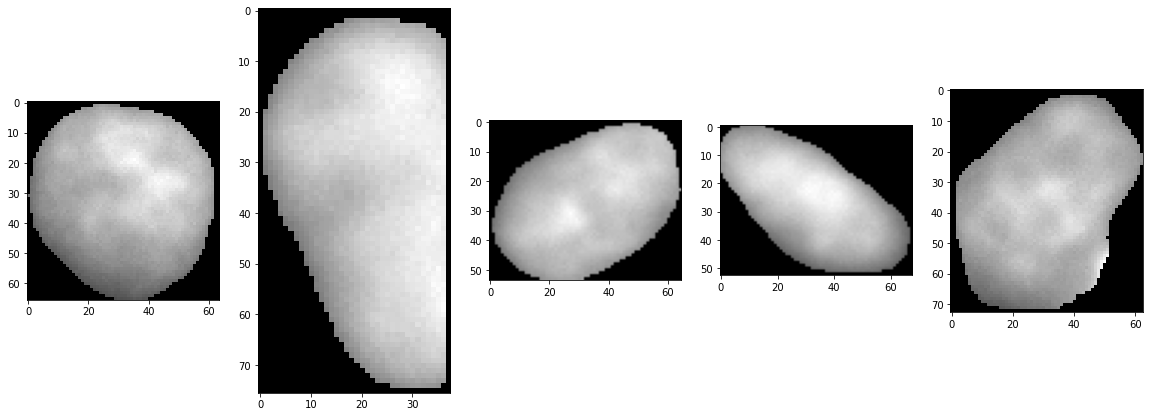

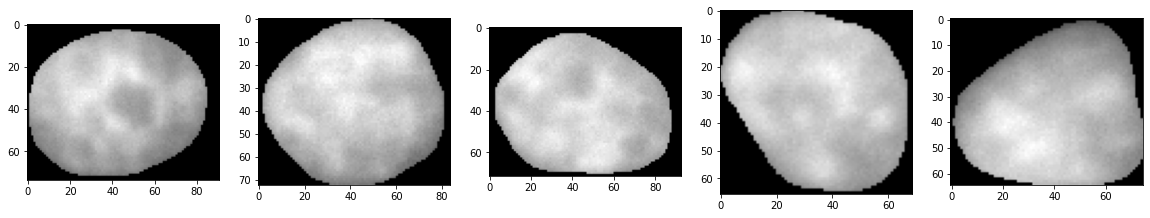

In [68]:
# NDAcquisition-01/
path = [
"../Datasets/211202NDAcquisition/CellSplit/NDAcquisition-01x40/NDAcquisition-01x40_XY0004_17_",
"../Datasets/211202NDAcquisition/CellSplit/NDAcquisition-02Nami_x40/NDAcquisition-02Nami_x40_XY013_18_"]

nval=2
mval=5
for n in range(1,nval+1):
    plt.figure(figsize=(20,20))
    for m in range(1,mval+1):
        img = cv2.imread(path[n-1]+str(m-1)+".tif")
        img = img/np.amax(img)
        plt.subplot(n,mval,m)
        plt.imshow(img)

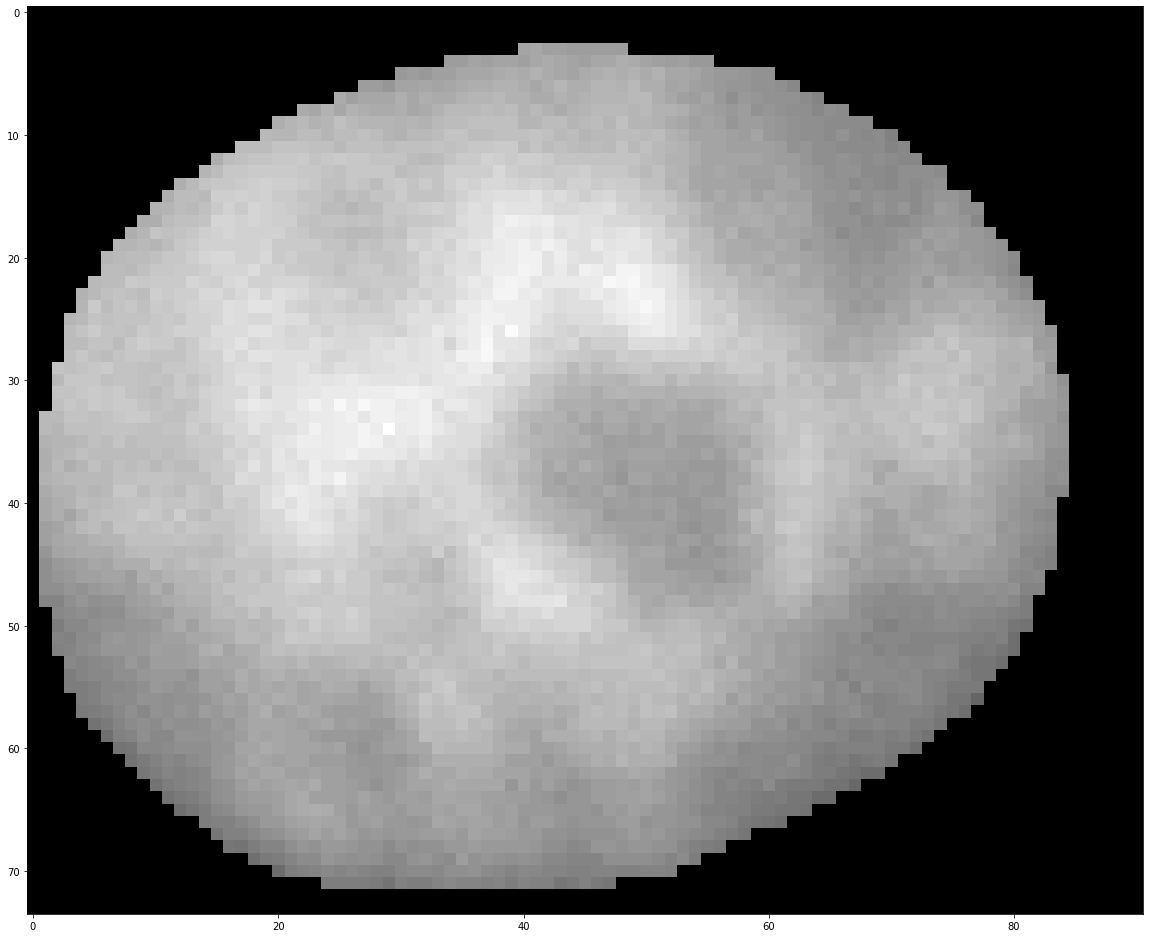

In [71]:
plt.figure(figsize=(20,20))
img = cv2.imread(path[1]+"0.tif")
img = img/np.amax(img)
plt.imshow(img)
plt.show()